# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [0]:
import cv2
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
path = 'gdrive/My Drive/colab/dlcv_marathon/'
os.chdir(path)

In [0]:
import cv2
import time
import numpy as np

img = cv2.imread('./data/lena.png')

## Affine Transformation - Case 2: any three point

In [0]:
rows, cols = img.shape[:2]

# 取得 affine 矩陣並做 affine 操作
# getRotationMatrix2D(center, angle, scale)
M_affine = cv2.getRotationMatrix2D((cols//2, rows//2), 60, 0.7)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

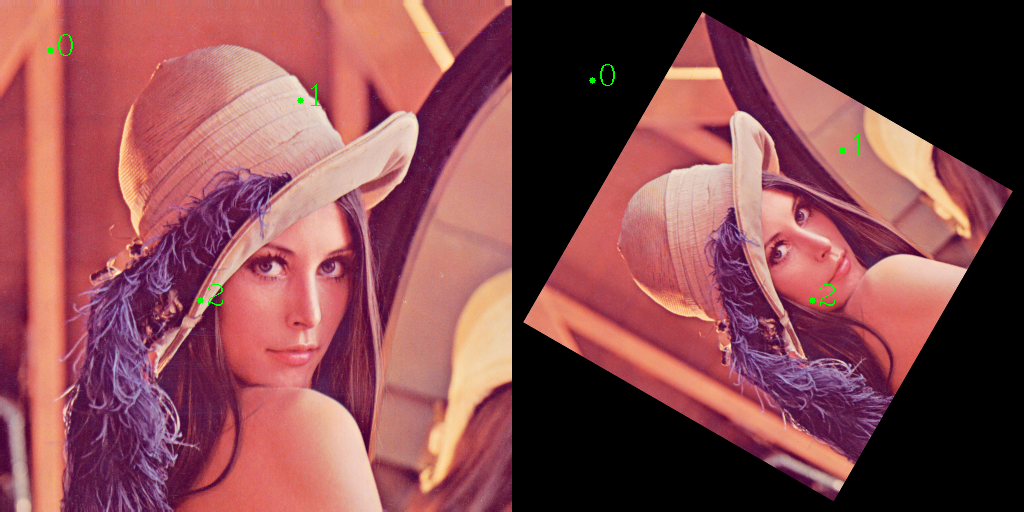

In [24]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    # map(function, iterable, ...) Apply function to every item of iterable and return a list of the results, similar to R's apply.
    # The int() function converts the specified value into an integer number.
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
cv2_imshow(img_show_affine)